Info Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       93 non-null     object        
 1   date         93 non-null     datetime64[ns]
 2   BTC_OPEN     93 non-null     float64       
 3   BTC_HIGH     93 non-null     float64       
 4   BTC_LOW      93 non-null     float64       
 5   BTC_CLOSE    93 non-null     float64       
 6   BTC_NETWORK  93 non-null     object        
 7   ETH_OPEN     93 non-null     float64       
 8   ETH_HIGH     93 non-null     float64       
 9   ETH_LOW      93 non-null     float64       
 10  ETH_CLOSE    93 non-null     float64       
 11  ETH_NETWORK  93 non-null     object        
 12  BNB_OPEN     93 non-null     float64       
 13  BNB_HIGH     93 non-null     float64       
 14  BNB_LOW      93 non-null     float64       
 15  BNB_CLOSE    93 non-null     float64       
 16  

/tmp/ipython-input-1693701003.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["date"] = pd.to_datetime(df_clean["date"])


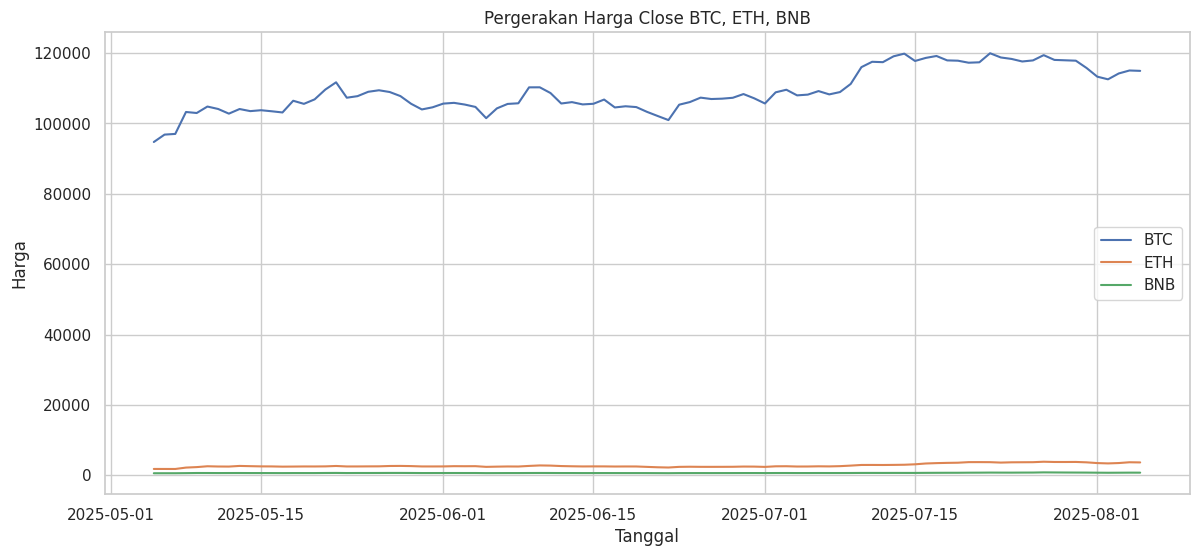

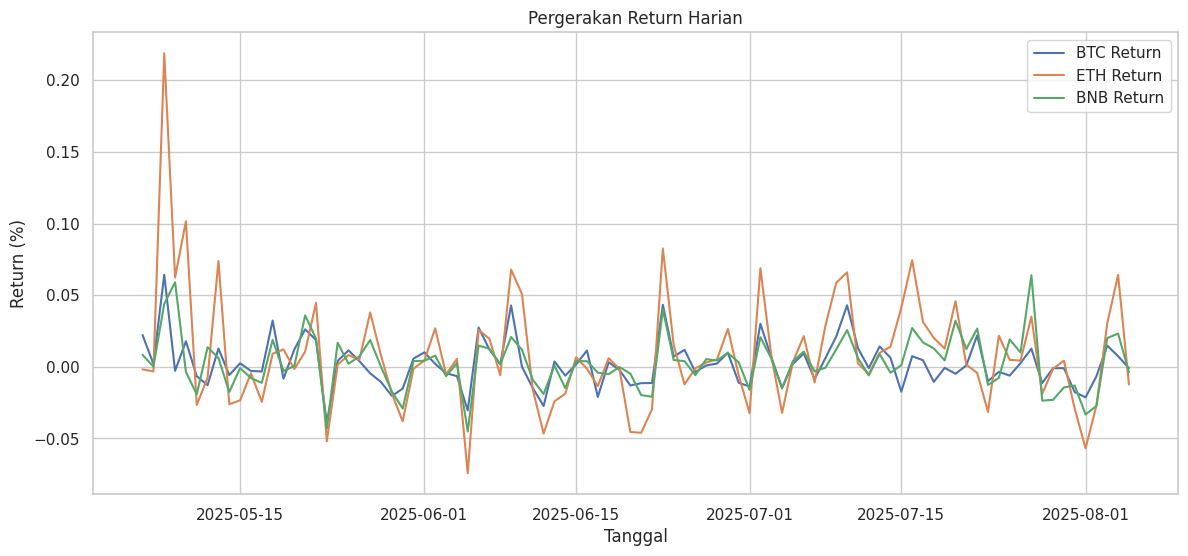

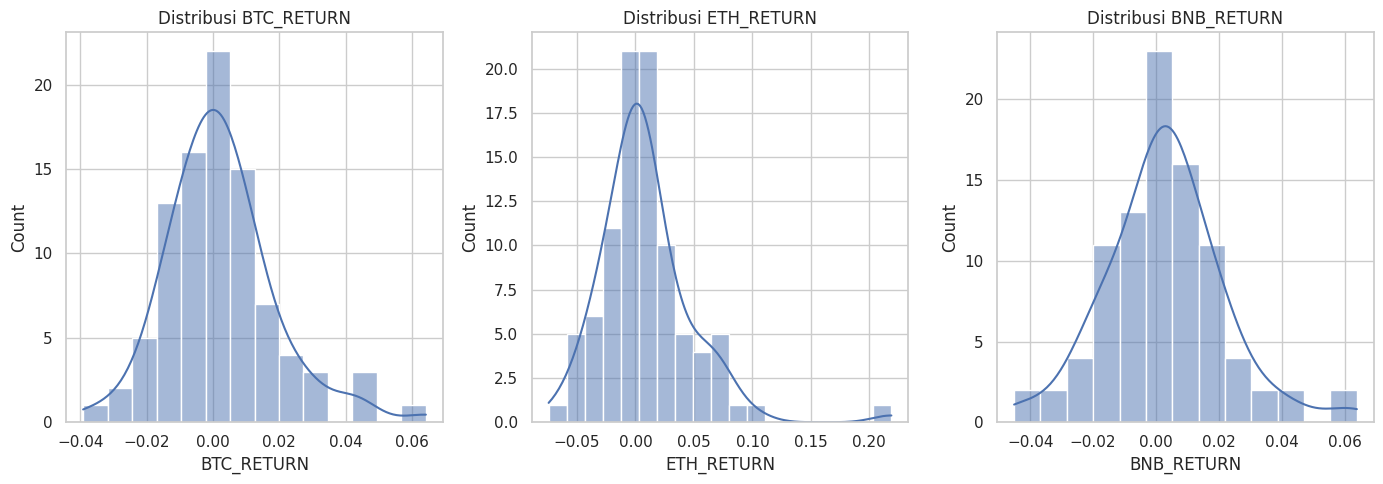

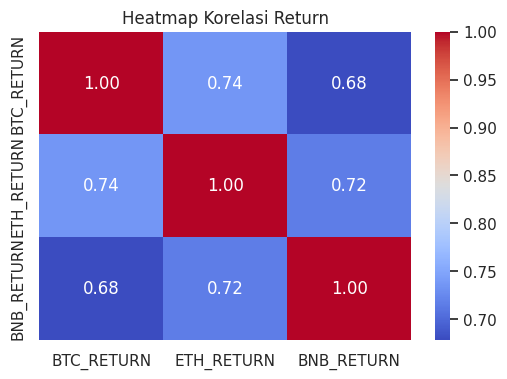


=== Volatilitas (Std Dev) ===
BTC_RETURN    0.016463
ETH_RETURN    0.039741
BNB_RETURN    0.018847
dtype: float64


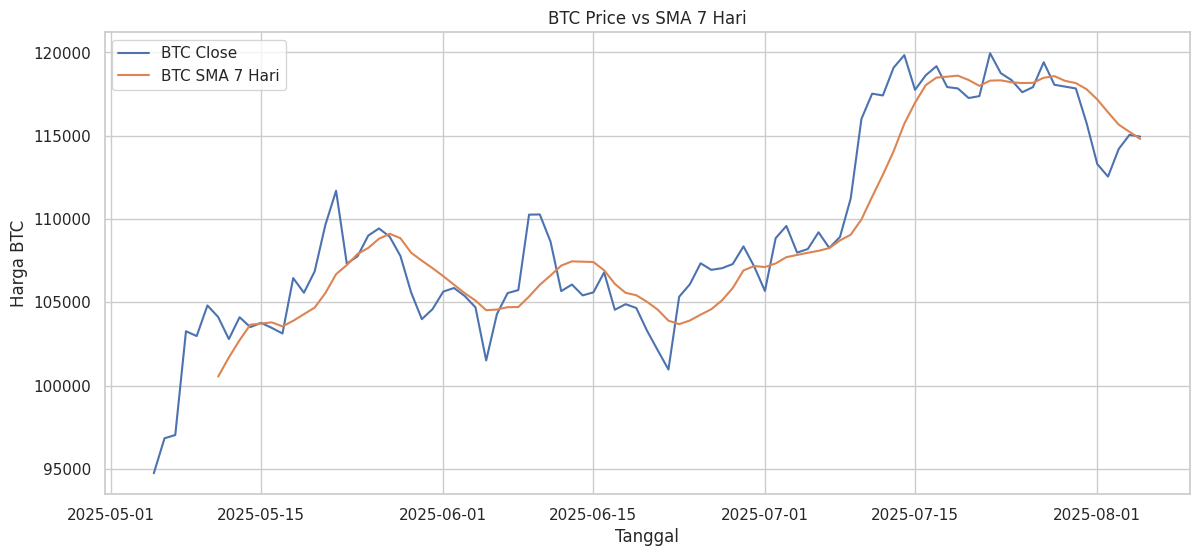

In [11]:
# 1. Import library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 2. Load data (Google Colab — folder sample_data)
file_path = "/content/sample_data/Exploratory Data Analysis (EDA) dan Visualisasi Data.xlsx"

df = pd.read_excel(file_path, sheet_name="Dataset_Asli")

print("Info Data")
print(df.info())
print("\n5 Data Teratas")
print(df.head())

# 3. Data Cleaning

# Hapus kolom-kolom “Unnamed”
df_clean = df.loc[:, ~df.columns.str.contains("Unnamed")]

# Konversi kolom tanggal
df_clean["date"] = pd.to_datetime(df_clean["date"])

# Sort berdasarkan tanggal
df_clean = df_clean.sort_values("date")

print("\nKolom setelah dibersihkan")
print(df_clean.columns)

# 4. Menambah kolom return
df_clean["BTC_RETURN"] = df_clean["BTC_CLOSE"].pct_change()
df_clean["ETH_RETURN"] = df_clean["ETH_CLOSE"].pct_change()
df_clean["BNB_RETURN"] = df_clean["BNB_CLOSE"].pct_change()

# 5. Menghitung statistik Deskriptif
print("\nStatistik Deskriptif")
print(df_clean.describe())

# 6. Visualisasi harga close tiap symbol
plt.figure(figsize=(14,6))
plt.plot(df_clean["date"], df_clean["BTC_CLOSE"], label="BTC")
plt.plot(df_clean["date"], df_clean["ETH_CLOSE"], label="ETH")
plt.plot(df_clean["date"], df_clean["BNB_CLOSE"], label="BNB")
plt.title("Pergerakan Harga Close BTC, ETH, BNB")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.legend()
plt.show()

# 7. Visualisasi return tiap symbol
plt.figure(figsize=(14,6))
plt.plot(df_clean["date"], df_clean["BTC_RETURN"], label="BTC Return")
plt.plot(df_clean["date"], df_clean["ETH_RETURN"], label="ETH Return")
plt.plot(df_clean["date"], df_clean["BNB_RETURN"], label="BNB Return")
plt.title("Pergerakan Return Harian")
plt.xlabel("Tanggal")
plt.ylabel("Return (%)")
plt.legend()
plt.show()

# 8. Distribusi return
coins = ["BTC_RETURN", "ETH_RETURN", "BNB_RETURN"]

plt.figure(figsize=(14,5))
for i, coin in enumerate(coins, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_clean[coin].dropna(), kde=True)
    plt.title(f"Distribusi {coin}")
plt.tight_layout()
plt.show()

# 9. Korelasi antar return
plt.figure(figsize=(6,4))
sns.heatmap(df_clean[["BTC_RETURN", "ETH_RETURN", "BNB_RETURN"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Return")
plt.show()

# 10. Volatilitas
volatility = df_clean[["BTC_RETURN","ETH_RETURN","BNB_RETURN"]].std()
print("\n=== Volatilitas (Std Dev) ===")
print(volatility)

# 11. Trendline SMA
df_clean["BTC_SMA_7"] = df_clean["BTC_CLOSE"].rolling(7).mean()

plt.figure(figsize=(14,6))
plt.plot(df_clean["date"], df_clean["BTC_CLOSE"], label="BTC Close")
plt.plot(df_clean["date"], df_clean["BTC_SMA_7"], label="BTC SMA 7 Hari")
plt.title("BTC Price vs SMA 7 Hari")
plt.xlabel("Tanggal")
plt.ylabel("Harga BTC")
plt.legend()
plt.show()